# Foundations of Data Science

### Part 1: Critique this plan (8 points)
1\. After a few beers your CIO invited his buddy from Green Berry consulting to propose a project using data mining to improve the targeting of the new service that you have been a principal in developing. The service has been quite successful so far, being marketed over the last 6 months via your ingenious, and very inexpensive, word-of-mouth campaign. You've already garnered a pretty large customer base without any targeting, and you've been seeing this success as your best stepping stone to bigger and better things in the firm. 

After some reflection, you've decided that your best course of action is to play a key role in ensuring the success of this data mining project as well. You agree with your CIO's statement in a meeting with Green Berry, that accurate targeting might cost-effectively expand your audience substantially to consumers that word-of-mouth would not reach. You accept that what Green Berry says about the characteristics of your service is accurate.

Based on what we have covered in class, identify the four most serious weaknesses/flaws in this abridged version of Green Berry's proposal, and suggest how to ameliorate them.  Your answer should be 4 bullet points, each comprising 2-4 sentences: 1-2 sentences stating each weakness, and 1-2 sentences suggesting a better alternative.  Maximal credit will be given when the 4 points are as independent as possible.


```
--- -------------------------------------------------------------------------- ---
                            Targeted Audience Expansion             
                      Prepared by Green Berry Consulting, Inc.

Your problem is to expand the audience of your new service.  We (Green Berry) have a 
large database of consumers who can be targeted.  We will build a predictive model 
to estimate which of these consumers are the most likely to adopt the product, and
then target them with the special offer you have designed.

More specifically, we will build a logistic regression (LR) model to predict adop-
tion of the service by a consumer, based on the data on your current customers of 
this service.  The model will be based on their demographics and their usage of 
the service. We believe that logistic regression is the best choice of method be-
cause it is a tried-and-true statistical modeling technique, and we can easily 
interpret the coefficients of the model to infer whether the attributes are stat-
istically significant, and whether they make sense. If they are statistically sig-
nificant and they do make sense, then we can have confidence that the model will 
be accurate in predicting service uptake. We will apply the model to our large 
database of consumers, and select out those who have not yet subscribed and whom
the LR model predicts to be the most likely to subscribe.  To these we will send 
the targeted offer. As this is a fixed-profit-per-customer service, this also 
will in effect rank them by expected profit.
--- -------------------------------------------------------------------------- ---
```

- The model will be trained based on only the data of current customers using the mentioned service. This data wouldn't have the observations with negative labels i.e. data of customer not using this service. Some of the data of consumers in the dataset of Green Berry Consulting that are not using this service could be merged with the data of current customers using the service. But this create a imbalance which can be solved by resampling the dataset with different ratios or creating clusters, and/or using a different model like XGBoost with hyper-parameter optimization.


- The Logistic Regression model cannot be used to easily interpret the coefficients of the model as the logit transformation of the target variable has a linear relationship with the predictor variables. This makes it difficult to analyze or determine the importance of features that contribute most to the target variable. Some other algorithms like Random Forests can be a better alternative for better understanding the feature importance.


- The outcome of Logistic Regression model is dichotomous, i.e. the dependent variable will have only 0/1 or True/False values. Some other model like Linear Regression or Fractional Logistic Regression will be a better choice to predict the likeliness for a customer using this service.


- The training model will be based on demogrpahic and usage data of the service. On the other hand, the model will be applied to the database of Green Berry Consulting which will not have usage data of the service for all their consumers. Assuming that Green Berry's database contains the demographic data of the consumers, usage data (signifying an extent to which a customer uses this service) can be considered as a target variable instead of a simple prediction whether consumer will use the service. This will not require for the test dataset to contain usage data of the service. Also, this will help in accurately ranking the customers based on expected profit, as the usage data can be used as a parameter for fixed-profit-per-customer.

### Part 2: Sentiment analysis (12 points)

In this assignment we will be looking at a directed, signed network regarding Wikipedia editors who want to become an administrator. In order for this to happen, a request for adminship (RfA) is submitted, either by the candidate or by another community member. Subsequently, any Wikipedia member may cast a supporting, neutral, or opposing vote.

The dataset and further description can be found here:
https://snap.stanford.edu/data/wiki-RfA.html

In sum, nodes represent Wikipedia members and edges represent votes. Each entry in the dataset also includes text of a comment associated with the vote.



1\. Convert the data into a pandas `DataFrame()`, which will have one column for each of the data attributes, SRC, TGT, etc. (3 points) 

In [1]:
import pandas as pd
from collections import OrderedDict

file = open('rfa_all.NL-SEPARATED.txt', encoding='utf8')
lines = file.readlines()
data = OrderedDict()

for line in lines:
    line = line.replace('\n', '')
    if line != '':
        key, value = line.split(':',1)
        try:
            data[key].append(str(value))
        except KeyError:
            # first occurence of each key
            data[key] = [value]

df = pd.DataFrame.from_dict(data, orient='columns', dtype=None)


2\. Using the VOT column as the target variable, code the values as -1 or 0  as '0' and 1 to stay as '1'. (1 point)


In [2]:
df['VOT'] = df['VOT'].replace(['-1','0',], 0)
df['VOT'] = df['VOT'].replace(['1'], 1)


3\. Put all of the text (TXT column) into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training. (2 points)

In [3]:
from sklearn.model_selection import train_test_split

X = df['TXT']
Y = df['VOT']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data. (3 points)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer(binary=True, ngram_range=(1,2), stop_words='english')
count_vectorizer.fit(X_train)

X_train_count = count_vectorizer.transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
tfidf_vectorizer.fit(X_train)

X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

5\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph. (3 points)

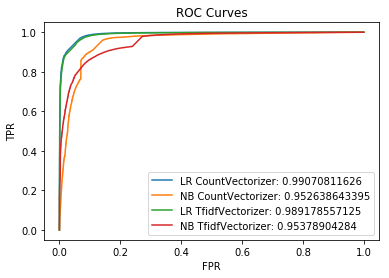

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt

lr_model_count = LogisticRegression()
lr_model_count.fit(X_train_count, Y_train)

nb_model_count = MultinomialNB()
nb_model_count.fit(X_train_count, Y_train)

lr_model_tfidf = LogisticRegression()
lr_model_tfidf.fit(X_train_tfidf, Y_train)

nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, Y_train)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, lr_model_count.predict_proba(X_test_count)[:,1])
plt.plot(fpr, tpr, label='LR CountVectorizer: '+str(metrics.auc(fpr,tpr)))

fpr, tpr, thresholds = metrics.roc_curve(Y_test, nb_model_count.predict_proba(X_test_count)[:,1])
plt.plot(fpr, tpr, label='NB CountVectorizer: '+str(metrics.auc(fpr,tpr)))

fpr, tpr, thresholds = metrics.roc_curve(Y_test, lr_model_tfidf.predict_proba(X_test_tfidf)[:,1])
plt.plot(fpr, tpr, label='LR TfidfVectorizer: '+str(metrics.auc(fpr,tpr)))

fpr, tpr, thresholds = metrics.roc_curve(Y_test, nb_model_tfidf.predict_proba(X_test_tfidf)[:,1])
plt.plot(fpr, tpr, label='NB TfidfVectorizer: '+str(metrics.auc(fpr,tpr)))

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC Curves")
plt.legend()
plt.show()


Logistic Regression does a better job.  Naive Bayes assumes that all the features are conditionally independent and will give dependent features strong weights, so their influence would be double-counted. But logistic regression will compensate this by weighting them lower. Linear regression objective function (conditional likelihood) is very insensitive to redundant and duplicate features.

### Part 3: Network analysis and visualization (10 points)

In this part of the assignment we will analyze basic characteristics of the same Wikipedia network used in Part 2.


1. Prepare an edgefile for importing. First, map the node names to integer values. For data values, let's just start with the VOT column value. (2 points)

In [16]:
import networkx as nx

graph_df = df

# There are some rows in SRC where the user string is empty, and if these strings are removed using the below commented code,
# then the Number of nodes decreases to 11398, but I am not doing this to match the numbers given on the data website.
# graph_df = df.loc[df['SRC']!='']

graph_df = graph_df[['SRC', 'TGT', 'VOT', 'RES']]

# mapping the node names to integer values
nodes = list(set(graph_df['SRC'])|set(graph_df['TGT']))
nodes_dict = dict(zip(nodes, range(len(nodes))))
graph_df = graph_df.applymap(lambda x: nodes_dict.get(x) if x in nodes_dict else x)

nodes = list(set(graph_df['SRC'])|set(graph_df['TGT']))

edges = []

for index, row in graph_df.iterrows():
    edges.append((row['SRC'], row['TGT'], row['VOT']))

MDG = nx.MultiDiGraph()
MDG.add_nodes_from(nodes)
MDG.add_weighted_edges_from(edges)

nx.write_weighted_edgelist(MDG, "wikipedia.edgelist")


2\. Now load the data as a graph object called 'Gwik'. (1 point)

In [17]:
Gwik = nx.read_weighted_edgelist("wikipedia.edgelist", create_using=nx.MultiDiGraph())


3\. Confirm the number of nodes and edges in the graph object. (2 points)

In [18]:
print(nx.info(Gwik))


Name: 
Type: MultiDiGraph
Number of nodes: 11402
Number of edges: 198275
Average in degree:  17.3895
Average out degree:  17.3895


4\. Compute the degree, betweneess and closeness centrality measures for the graph. Are all 3 meaningful here given what you know about the nodes and edges? (2 points)

In [19]:
# Degree
nx.degree_centrality(Gwik).values()


dict_values([0.14568897465134636, 0.017279186036312604, 0.017016051223576877, 0.011314796947636171, 0.007192351548109814, 0.015349530742917287, 0.009385141654240856, 0.03666345057451101, 0.01070081571791948, 0.012718182615560038, 0.006227523901412156, 0.0214893430400842, 0.009034295237259888, 0.006929216735374089, 0.01552495395140777, 0.01333216384527673, 0.021752477852819925, 0.011051662134900447, 0.013419875449521971, 0.012893605824050521, 0.022015612665555653, 0.007894044382071747, 0.0057889658801859485, 0.002455924918866766, 0.0018419436891500744, 0.029646522234891674, 0.007016928339619331, 0.016226646785369704, 0.009735988071221821, 0.004297868608016841, 0.013770721866502937, 0.006666081922638365, 0.010262257696693271, 0.0018419436891500744, 0.017980878870274535, 0.006490658714147881, 0.011841066573107621, 0.010525392509428997, 0.013244452241031487, 0.013858433470748178, 0.009034295237259888, 0.06894132093675993, 0.02938338742215595, 0.023682133146215242, 0.009297430049995614, 0.0

In [30]:
# Betweenness
nx.betweenness_centrality(Gwik).values()

dict_values([0.0, 0.0, 0.0018057240934678915, 0.0006400593394386859, 0.0, 8.725574697281393e-05, 4.075902549000368e-05, 0.005674984570913549, 0.0, 0.0002658395035972134, 3.2014462730751924e-06, 0.0009013598048147535, 0.0002536054931377478, 0.0, 0.00018128173932286068, 0.0002874563246580248, 0.0008071826262461458, 0.0002023053763715688, 0.00024012265368878773, 0.0, 0.0007032662825374887, 5.39982838518352e-05, 2.3378928224157912e-05, 4.502138129361234e-07, 1.319405803319992e-06, 0.0007870383616877997, 7.43517087040149e-05, 0.000474102116205105, 7.196776579410468e-05, 3.137578378361816e-05, 0.0003225070762510013, 8.403657000086486e-05, 0.00029966811119083237, 2.3495564069141337e-07, 0.0002666301735527993, 7.299189743724345e-05, 0.00015552472549550532, 0.00015143411612425194, 0.00015634189672651664, 0.00010790655922579426, 2.4386794516883826e-05, 0.00457555909466475, 0.0007079610329866745, 0.0009664447157814558, 0.0002454017389530914, 0.0005688174193453321, 0.0032138152716578603, 0.0002640

In [29]:
# Closeness
nx.closeness_centrality(Gwik).values()

dict_values([0.171101228838575, 0.0, 0.10756830094274276, 0.09370540707575266, 0.0, 0.07847209033302277, 0.07966862285744782, 0.13179809822696814, 0.0, 0.08826444795522509, 0.07455045507367546, 0.10421521468503073, 0.09538163442918554, 0.0, 0.08494038043563039, 0.09022519931556332, 0.09902430446786206, 0.0897268896196541, 0.09318472816925538, 0.0, 0.09386613676198895, 0.07250733590743037, 0.07999963044645315, 8.771160424524164e-05, 8.771160424524164e-05, 0.09402741878391677, 0.07688222396573141, 0.09731890648750952, 0.092744197387615, 0.07951630444421472, 0.09484221444062314, 0.09289334377848223, 0.0875657063258002, 0.07171220062849518, 0.08507242651878183, 0.08888315925051732, 0.08880724264712603, 0.08967272073415711, 0.09284357504353528, 0.06995123768249135, 0.0919649033179331, 0.11904685103189279, 0.10964412073315952, 0.11229670557431165, 0.079340343144796, 0.09398492243627873, 0.1166560301708237, 0.09369696286496815, 0.10574140108944896, 0.0855554346179998, 0.09026436295794354, 0.0

- Degree is meaningful here as it gives a measure of the number of votes a voter has given and also the number of votes a votee has received.

- Betweenness is not meaningful here as it computes the number of shortest paths from all voters/votee to all others that pass through that voter/votee.

- Closeness is not very meaningful here as it is a measure of the degree to which an individual votee or voter is near all other votee and voters in the network.

5\. Now visualize the graph. How do you visualize the edges to communicate vote values? (1 point)

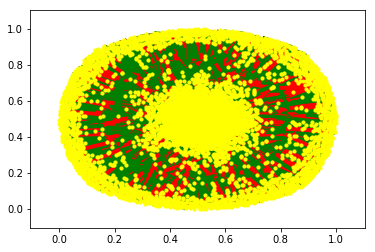

In [20]:
color_map = []

for index, row in graph_df.iterrows():
    if row['VOT'] == 1:
        color_map.append('green')
    else:
        color_map.append('red')

# The visualization of edges to communicate vote values can be done by assigning colors to the edges representing the votes.
# e.g. edges with VOT = 0 can be assigned red color and those with VOT = 1 can be assigned green color

nx.draw_networkx(Gwik, node_color='yellow', edge_color=color_map, node_size=10, with_labels=False)

plt.show()


6\. Now also add in the resolution of the vote into your graph, and a new visualization of the network. Explain your choice of how to visually show this new information? (2 points)

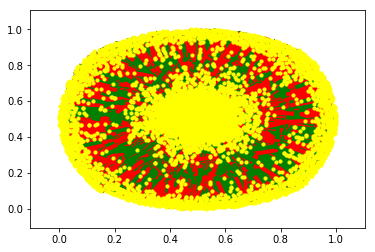

In [28]:
color_map = []

for index, row in graph_df.iterrows():
    MDG[row['SRC']][row['TGT']][row['VOT']] = int(row['RES'])
    
    if row['RES'] == '1':
        color_map.append('green')
    else:
        color_map.append('red')

nx.draw_networkx(Gwik, node_color='yellow', edge_color=color_map, node_size=10, with_labels=False)

plt.show()

# The visualization of resolution of the vote is being done by assigning colors to the edges representing the resolution.
# e.g. edges with RES = 0 are assigned red color and those with RES = 1 are assigned green color
